# Column-integrated water vapor transport

## Necessary libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as patches
import wrf
import seaborn as sns
import matplotlib.colors as mcolors

## Datasets

In [2]:
# define main paths for observations and reanalysis + for simulations
obs_path = '/media/irene/Elements/Laptop_dec2023/Thesis_data/obs/'
sim_path = '/media/irene/Elements/wrf_micro/'

In [3]:
# Open datasets
#ERA5: Q, U, V
ds_ERA = xr.open_dataset(f'{obs_path}/ERA5-WTQ-MCScase.nc') #with range lat:25-40, lon:70-114 and days 2008-July 14 to 24
ds_uERA, ds_vERA = xr.open_dataset(f'{obs_path}/ERA5-UV-MCScase.nc'), xr.open_dataset(f'{obs_path}/ERA5-UV-MCScase.nc') #with range lat:26-35, lon:100-114 and days 2008-July 16 to 24
ds_ivtERA = xr.open_dataset(f'{obs_path}/ERA5-IVT-MCScase.nc') #already cut for time and space


#WRF: Q, U, V
ds_qtho = xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_QV-16to24.nc')
ds_qmor = xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_QV-16to24.nc')
ds_qcam = xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_QV-16to24.nc')
ds_qylin = xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_QV-16to24.nc')
ds_qwdm7 = xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_QV-16to24.nc')
ds_qwdm6 = xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_QV-16to24.nc')
ds_utho, ds_vtho = xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_U-16to24.nc'), xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_V-16to24.nc')
ds_umor, ds_vmor = xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_U-16to24.nc'), xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_V-16to24.nc')
ds_ucam, ds_vcam = xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_U-16to24.nc'), xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_V-16to24.nc')
ds_uylin, ds_vylin = xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_U-16to24.nc'), xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_V-16to24.nc')
ds_uwdm7, ds_vwdm7 = xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_U-16to24.nc'), xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_V-16to24.nc')
ds_uwdm6, ds_vwdm6 = xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_U-16to24.nc'), xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_V-16to24.nc')

# To interpolate WRF and get the same levels as ERA5: P and PB
ds_Ptho, ds_PBtho = xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_P-16to24.nc'), xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_PB-16to24.nc')
ds_Pmor, ds_PBmor = xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_P-16to24.nc'), xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_PB-16to24.nc')
ds_Pcam, ds_PBcam = xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_P-16to24.nc'), xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_PB-16to24.nc')
ds_Pylin, ds_PBylin = xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_P-16to24.nc'), xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_PB-16to24.nc')
ds_Pwdm7, ds_PBwdm7 = xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_P-16to24.nc'), xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_PB-16to24.nc')
ds_Pwdm6, ds_PBwdm6 = xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_P-16to24.nc'), xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_PB-16to24.nc')

## Cut to right temporal and spatial domain

In [4]:
# Cut time and space
ds_ERA = ds_ERA.sel(time=slice('2008-07-16T00:00:00.000000000', '2008-07-24T23:00:00.000000000'))

In [5]:
# Define Sichuan Basin
lat1, lat2 = 26, 35
lon1, lon2 = 100, 114

ds_ERA = ds_ERA.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qtho, ds_utho, ds_vtho = ds_qtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_utho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_vtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qmor, ds_umor, ds_vmor = ds_qmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_umor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_vmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qcam, ds_ucam, ds_vcam = ds_qcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_ucam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_vcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qylin, ds_uylin, ds_vylin = ds_qylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_uylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_vylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qwdm7, ds_uwdm7, ds_vwdm7 = ds_qwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_uwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_vwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qwdm6, ds_uwdm6, ds_vwdm6 = ds_qwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_uwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_vwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

# 
ds_Pthoc, ds_PBthoc = ds_Ptho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pmorc, ds_PBmorc = ds_Pmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pcamc, ds_PBcamc = ds_Pcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pylinc, ds_PBylinc = ds_Pylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pwdm7c, ds_PBwdm7c = ds_Pwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pwdm6c, ds_PBwdm6c = ds_Pwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

## Compute pressure levels

In [6]:
# Compute pressure levels of wrf variables (to convert from wrf vertical coordinate system to ERA5 vertical coordinates)
thopr_lev = (ds_Pthoc.P + ds_PBthoc.PB)/100 #/100 is to have it in hPa
morpr_lev = (ds_Pmorc.P + ds_PBmorc.PB)/100 
campr_lev = (ds_Pcamc.P + ds_PBcamc.PB)/100
ylinpr_lev = (ds_Pylinc.P + ds_PBylinc.PB)/100
wdm7pr_lev = (ds_Pwdm7c.P + ds_PBwdm7c.PB)/100
wdm6pr_lev = (ds_Pwdm6c.P + ds_PBwdm6c.PB)/100

In [7]:
# Mean over time to be able to interpolate (cause interpolation is max for 3D variables)
thoprt_lev = thopr_lev.mean(dim=('XTIME'))
morprt_lev = morpr_lev.mean(dim=('XTIME'))
camprt_lev = campr_lev.mean(dim=('XTIME'))
ylinprt_lev = ylinpr_lev.mean(dim=('XTIME'))
wdm7prt_lev = wdm7pr_lev.mean(dim=('XTIME'))
wdm6prt_lev = wdm6pr_lev.mean(dim=('XTIME'))

## Prepare data

In [8]:
# Calculate IVT: need Q, U, V means over time
meant_qERA, meant_uERA, meant_vERA = ds_ERA.q.mean('time'), ds_uERA.u.mean('time'), ds_vERA.v.mean('time') #q: kg/kg - u,v: m/s
meant_qtho, meant_utho, meant_vtho = ds_qtho.QVAPOR.mean('XTIME'), ds_utho.U.mean('XTIME'), ds_vtho.V.mean('XTIME')
meant_qmor, meant_umor, meant_vmor = ds_qmor.QVAPOR.mean('XTIME'), ds_umor.U.mean('XTIME'), ds_vmor.V.mean('XTIME')
meant_qcam, meant_ucam, meant_vcam = ds_qcam.QVAPOR.mean('XTIME'), ds_ucam.U.mean('XTIME'), ds_vcam.V.mean('XTIME')
meant_qylin, meant_uylin, meant_vylin = ds_qylin.QVAPOR.mean('XTIME'), ds_uylin.U.mean('XTIME'), ds_vylin.V.mean('XTIME')
meant_qwdm7, meant_uwdm7, meant_vwdm7 = ds_qwdm7.QVAPOR.mean('XTIME'), ds_uwdm7.U.mean('XTIME'), ds_vwdm7.V.mean('XTIME')
meant_qwdm6, meant_uwdm6, meant_vwdm6 = ds_qwdm6.QVAPOR.mean('XTIME'), ds_uwdm6.U.mean('XTIME'), ds_vwdm6.V.mean('XTIME')

In [9]:
# 3D interpolation: not all levels because of min and max levels of WRF
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875,900,925,950,975]

imeant_qtho, imeant_utho, imeant_vtho = wrf.interplevel(meant_qtho, thoprt_lev, ulev), wrf.interplevel(meant_utho, thoprt_lev, ulev), wrf.interplevel(meant_vtho, thoprt_lev, ulev)
imeant_qmor, imeant_umor, imeant_vmor = wrf.interplevel(meant_qmor, morprt_lev, ulev), wrf.interplevel(meant_umor, morprt_lev, ulev), wrf.interplevel(meant_vmor, morprt_lev, ulev)
imeant_qcam, imeant_ucam, imeant_vcam = wrf.interplevel(meant_qcam, camprt_lev, ulev), wrf.interplevel(meant_ucam, camprt_lev, ulev), wrf.interplevel(meant_vcam, camprt_lev, ulev)
imeant_qylin, imeant_uylin, imeant_vylin = wrf.interplevel(meant_qylin, ylinprt_lev, ulev), wrf.interplevel(meant_uylin, ylinprt_lev, ulev), wrf.interplevel(meant_vylin, ylinprt_lev, ulev)
imeant_qwdm7, imeant_uwdm7, imeant_vwdm7 = wrf.interplevel(meant_qwdm7, wdm7prt_lev, ulev), wrf.interplevel(meant_uwdm7, wdm7prt_lev, ulev), wrf.interplevel(meant_vwdm7, wdm7prt_lev, ulev)
imeant_qwdm6, imeant_uwdm6, imeant_vwdm6 = wrf.interplevel(meant_qwdm6, wdm6prt_lev, ulev), wrf.interplevel(meant_uwdm6, wdm6prt_lev, ulev), wrf.interplevel(meant_vwdm6, wdm6prt_lev, ulev)

In [10]:
meant_qERA, meant_uERA, meant_vERA = meant_qERA.sel(level=ulev), meant_uERA.sel(level=ulev), meant_vERA.sel(level=ulev)

## Compute IVT

In [19]:
# Define function to compute IVT
def IVT(values, pressure_levels):
    """ This function calculates the column-integrated water vapor transport                                                                                            
    in kg/m2 from specific humidity (kg/kg) at different hPa levels. 

    Parameters: 
       values(array-like): 3D field of specific humidity * horizontal winds (level,lat,lon)
       pressure_levels(array-like) : 1D field with corresponding pressure levels in hPa                       

    Returns: 
      2D field with column-integrated values 
    """
    values = np.nan_to_num(values, nan=0.0)
    g = 9.81 # gravitational acceleration (needed because levels are given in pressure rather than height)                                                                                                                   
    return np.trapz(values, pressure_levels, axis = 0)* (1/g) *100 #axis=0 integrated along vertical dimension

In [20]:
# Compute products Q*winds (averaged over time)
meant_quERA, meant_qvERA = meant_qERA*meant_uERA, meant_qERA*meant_vERA
meant_qutho, meant_qvtho = imeant_qtho*imeant_utho, imeant_qtho*imeant_vtho
meant_qumor, meant_qvmor = imeant_qmor*imeant_umor, imeant_qmor*imeant_vmor
meant_qucam, meant_qvcam = imeant_qcam*imeant_ucam, imeant_qcam*imeant_vcam
meant_quylin, meant_qvylin = imeant_qylin*imeant_uylin, imeant_qylin*imeant_vylin
meant_quwdm7, meant_qvwdm7 = imeant_qwdm7*imeant_uwdm7, imeant_qwdm7*imeant_vwdm7
meant_quwdm6, meant_qvwdm6 = imeant_qwdm6*imeant_uwdm6, imeant_qwdm6*imeant_vwdm6

In [21]:
# Compute south-north and west-east components of IVT
qu_intERA, qv_intERA = IVT(meant_quERA, meant_quERA.level), IVT(meant_qvERA, meant_qvERA.level)
qu_inttho, qv_inttho = IVT(meant_qutho, meant_qutho.level), IVT(meant_qvtho, meant_qvtho.level)
qu_intmor, qv_intmor = IVT(meant_qumor, meant_qumor.level), IVT(meant_qvmor, meant_qvmor.level)
qu_intcam, qv_intcam = IVT(meant_qucam, meant_qucam.level), IVT(meant_qvcam, meant_qvcam.level)
qu_intylin, qv_intylin = IVT(meant_quylin, meant_quylin.level), IVT(meant_qvylin, meant_qvylin.level)
qu_intwdm7, qv_intwdm7= IVT(meant_quwdm7, meant_quwdm7.level), IVT(meant_qvwdm7, meant_qvwdm7.level)
qu_intwdm6, qv_intwdm6 = IVT(meant_quwdm6, meant_quwdm6.level), IVT(meant_qvwdm6, meant_qvwdm6.level)

In [22]:
# Compute the total IVT using both directions
IVT_ERA = np.sqrt(qu_intERA**2 + qv_intERA**2)
IVT_tho = np.sqrt(qu_inttho**2 + qv_inttho**2)
IVT_mor = np.sqrt(qu_intmor**2 + qv_intmor**2)
IVT_cam = np.sqrt(qu_intcam**2 + qv_intcam**2)
IVT_ylin = np.sqrt(qu_intylin**2 + qv_intylin**2)
IVT_wdm7 = np.sqrt(qu_intwdm7**2 + qv_intwdm7**2)
IVT_wdm6 = np.sqrt(qu_intwdm6**2 + qv_intwdm6**2)

## Plot maps

In [23]:
# Elevation
elevation_data =  xr.open_dataset('/media/irene/Elements/Laptop_dec2023/Thesis_data/script/scripts29May/geopotential.nc')
height = elevation_data/9.81
height = height.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

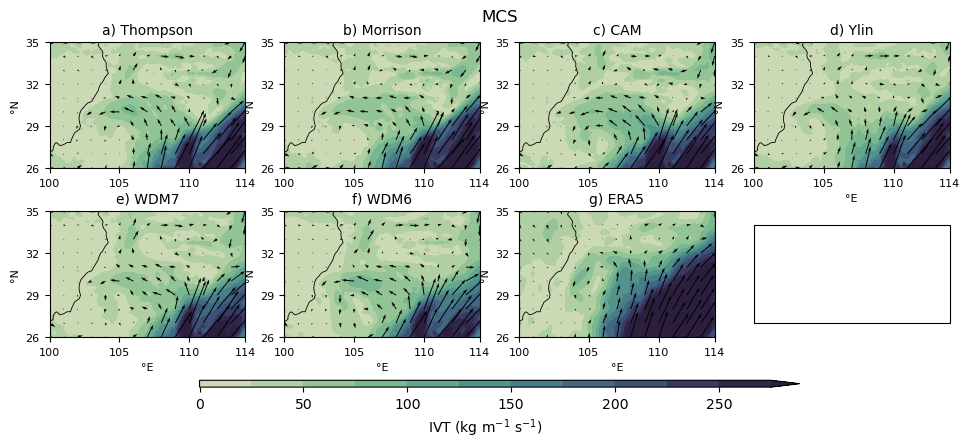

In [24]:
# Maps

#datasets
ds = [IVT_tho, IVT_mor, IVT_cam, IVT_ylin, IVT_wdm7, IVT_wdm6, IVT_ERA]
ds_qu = [ qu_inttho, qu_intmor, qu_intcam, qu_intylin, qu_intwdm7, qu_intwdm6, qu_intERA ]
ds_qv = [ qv_inttho, qv_intmor, qv_intcam, qv_intylin, qv_intwdm7, qv_intwdm6, qv_intERA ]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

# Set up figure
fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 3.8))
axs = axs.flatten()
fig.suptitle('MCS', y=1)

clevs=np.arange(0,300,25)
scale=9000 #set scale for arrows
step=4
cmap=sns.color_palette("flare", as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

for i in range(0,7):
    axs[i].set_xticks([100,105,110,114])
    axs[i].set_yticks([26,29,32,35])
    axs[i].tick_params(axis='x', labelsize=8)  
    axs[i].tick_params(axis='y', labelsize=8)
 

    c0 = axs[i].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[i], clevs, cmap=cmap, extend='max')
    axs[i].quiver(ds_ERA.longitude[::step], ds_ERA.latitude[::step], ds_qu[i][::step,::step], ds_qv[i][::step,::step], color='k')
    axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.6)
    axs[i].set_ylabel('°N', fontsize=8)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize = 10)

axs[0].set_ylabel('°N', fontsize=8)
axs[3].set_xlabel('°E',fontsize=8)
axs[4].set_xlabel('°E',fontsize=8)
axs[4].set_ylabel('°N',fontsize=8)
axs[5].set_xlabel('°E',fontsize=8)
axs[6].set_xlabel('°E', fontsize=8)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.005, 0.6, 0.018])
cbar=fig.colorbar(c0, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'IVT (kg m$^{-1}$ s$^{-1}$)', fontsize = 10)
cbar.ax.tick_params(labelsize=10)
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)

In [25]:
# compute differences using ERA5 as reference
diffIVT_tho, diffqu_inttho, diffqv_inttho = IVT_tho - IVT_ERA, qu_inttho - qu_intERA, qv_inttho - qv_intERA
diffIVT_mor, diffqu_intmor, diffqv_intmor = IVT_mor - IVT_ERA, qu_intmor - qu_intERA, qv_intmor - qv_intERA
diffIVT_cam, diffqu_intcam, diffqv_intcam = IVT_cam - IVT_ERA, qu_intcam - qu_intERA, qv_intcam - qv_intERA
diffIVT_ylin, diffqu_intylin, diffqv_intylin = IVT_ylin - IVT_ERA, qu_intylin - qu_intERA, qv_intylin - qv_intERA
diffIVT_wdm7, diffqu_intwdm7, diffqv_intwdm7 = IVT_wdm7 - IVT_ERA, qu_intwdm7 - qu_intERA, qv_intwdm7 - qv_intERA
diffIVT_wdm6, diffqu_intwdm6, diffqv_intwdm6 = IVT_wdm6 - IVT_ERA, qu_intwdm6 - qu_intERA, qv_intwdm6 - qv_intERA

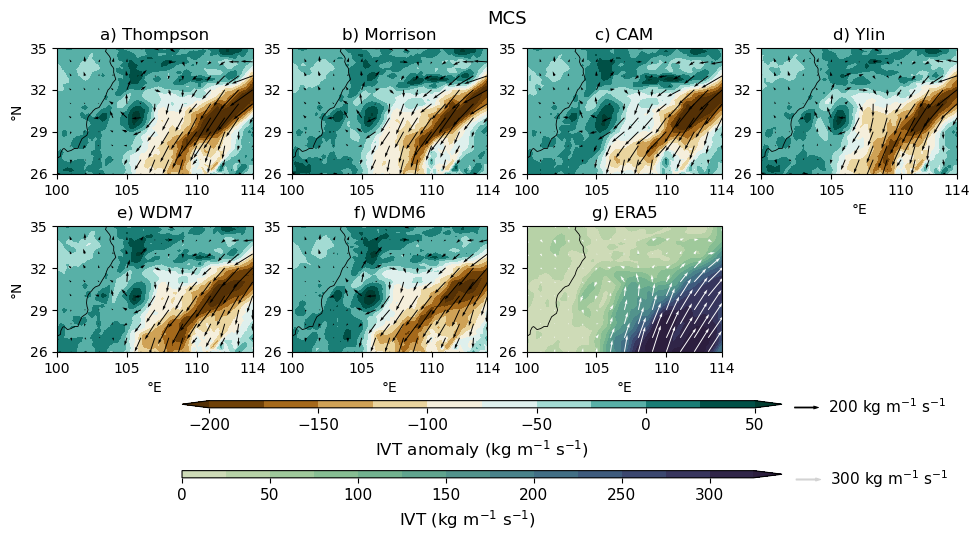

In [31]:
# Maps of anomalies for Article
from matplotlib import font_manager

#datasets
ds = [diffIVT_tho, diffIVT_mor, diffIVT_cam, diffIVT_ylin, diffIVT_wdm7, diffIVT_wdm6, IVT_ERA]
ds_qu = [ diffqu_inttho, diffqu_intmor, diffqu_intcam, diffqu_intylin, diffqu_intwdm7, diffqu_intwdm6, qu_intERA ]
ds_qv = [ diffqv_inttho, diffqv_intmor, diffqv_intcam, diffqv_intylin, diffqv_intwdm7, diffqv_intwdm6, qv_intERA ]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 4))
axs = axs.flatten()
fig.suptitle('MCS', y=1, fontsize=13)

clevs=np.arange(-200,65.1,25)
clevs1=np.arange(0,350,25)
scale=9000 #set scale for arrows
step=4
cmap = 'BrBG'

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-200, vmax=65.1, vcenter=0)

cmap1 = sns.color_palette("flare", as_cmap=True)
cmap1 = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True) 


for j in range(0,7):
    axs[j].set_xticks([100,105,110,114])
    axs[j].set_yticks([26,29,32,35])
    axs[j].tick_params(axis='x', labelsize=10)  
    axs[j].tick_params(axis='y', labelsize=10)
 
for i in range(0,6):
    c0 = axs[i].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[i], clevs, cmap=cmap, extend='both')
    quiver_plot = axs[i].quiver(ds_ERA.longitude[::step], ds_ERA.latitude[::step], ds_qu[i][::step,::step], ds_qv[i][::step,::step], color='k')
    axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.6)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12)


#era5
c6 = axs[6].contourf(ds_ERA.longitude, ds_ERA.latitude, IVT_ERA, clevs1, cmap=cmap1, extend='max')
quiver_plotE = axs[6].quiver(ds_ERA.longitude[::step], ds_ERA.latitude[::step], qu_intERA[::step,::step], qv_intERA[::step,::step], color='w')
axs[6].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='k', linewidths=0.6)
axs[6].set_xlabel('°E', fontsize=10)
axs[6].set_title('g) ERA5', fontsize=12)
axs[5].quiverkey(quiver_plot, X=2.69, Y=-0.44, U=200, color='k', label=r'200 kg m$^{-1}$ s$^{-1}$', labelpos='E', lw=0.6, fontproperties=font_manager.FontProperties(size=11) )
axs[6].quiverkey(quiver_plotE, X=1.5, Y=-1.01, U=300, color='#d3d3d3', label=r'300 kg m$^{-1}$ s$^{-1}$', labelpos='E', lw=0.8, fontproperties=font_manager.FontProperties(size=11) )

axs[0].set_ylabel('°N', fontsize=10)
axs[3].set_xlabel('°E',fontsize=10)
axs[4].set_xlabel('°E',fontsize=10)
axs[4].set_ylabel('°N',fontsize=10)
axs[5].set_xlabel('°E',fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)

axs[7].axis('off')


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.175, 0.005, 0.6, 0.018])
cbar=fig.colorbar(c0, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'IVT anomaly (kg m$^{-1}$ s$^{-1}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)

# Add a 2nd colorbar axis at the bottom of the graph
cbar_ax2 = fig.add_axes([0.175, -0.17, 0.6, 0.018])
cbar2 = fig.colorbar(c6, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(r'IVT (kg m$^{-1}$ s$^{-1}$)', fontsize = 12)
cbar2.ax.tick_params(labelsize=11)

fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)


# Save the plot as a hd file
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/ivt-mcs.png', dpi=400, bbox_inches='tight')

### IVT computed using from 300 hPa to surface

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
import numpy as np

# Get the original BrBG colormap with many samples
original_cmap = get_cmap('BrBG', 256)

# Convert to list of colors
colors = original_cmap(np.linspace(0, 1, 256))

# Define how much of the middle to remove
trim_fraction = 0.15  # remove 15% from the center (can adjust)

# Calculate number of colors to keep from each end
n_trim = int(256 * trim_fraction / 2)
trimmed_colors = np.vstack([colors[:128 - n_trim], colors[128 + n_trim:]])

# Create the new trimmed colormap
trimmed_cmap = mcolors.LinearSegmentedColormap.from_list("BrBG_trimmed", trimmed_colors)



/tmp/ipykernel_5760/2018389175.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  original_cmap = get_cmap('BrBG', 256)


/tmp/ipykernel_5760/4133672640.py:36: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in c0.collections:
/tmp/ipykernel_5760/4133672640.py:36: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in c0.collections:
/tmp/ipykernel_5760/4133672640.py:36: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in c0.collections:
/tmp/ipykernel_5760/4133672640.py:36: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in c0.collections:
/tmp/ipykernel_5760/4133672640.py:36: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in c0.col

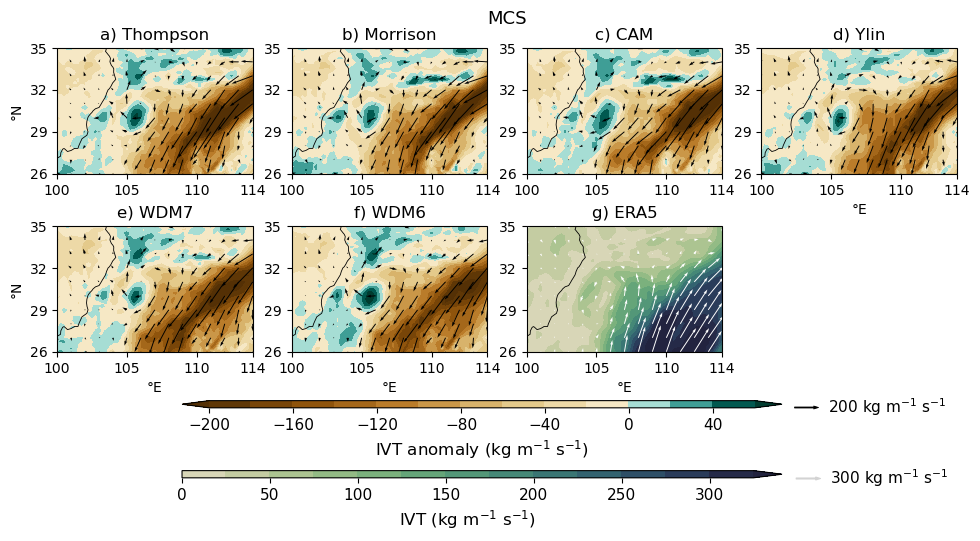

In [34]:
# Maps of anomalies for Article
from matplotlib import font_manager

#datasets
ds = [diffIVT_tho, diffIVT_mor, diffIVT_cam, diffIVT_ylin, diffIVT_wdm7, diffIVT_wdm6, IVT_ERA]
ds_qu = [ diffqu_inttho, diffqu_intmor, diffqu_intcam, diffqu_intylin, diffqu_intwdm7, diffqu_intwdm6, qu_intERA ]
ds_qv = [ diffqv_inttho, diffqv_intmor, diffqv_intcam, diffqv_intylin, diffqv_intwdm7, diffqv_intwdm6, qv_intERA ]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 4))
axs = axs.flatten()
fig.suptitle('MCS', y=1, fontsize=13)

clevs=np.arange(-200,60.1,20) #-200
clevs1=np.arange(0,350,25)
scale=9000 #set scale for arrows
step=4
cmap = 'BrBG'

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-200, vmax=60.1, vcenter=0) #-230

cmap1 = sns.color_palette("flare", as_cmap=True)
cmap1 = sns.cubehelix_palette(start=.3, rot=-.75, as_cmap=True) 


for j in range(0,7):
    axs[j].set_xticks([100,105,110,114])
    axs[j].set_yticks([26,29,32,35])
    axs[j].tick_params(axis='x', labelsize=10)  
    axs[j].tick_params(axis='y', labelsize=10)
 
for i in range(0,6):
    c0 = axs[i].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[i], clevs, cmap=trimmed_cmap, norm=norm, extend='both')
    # Rasterize just the color field (important!)
    for col in c0.collections:
        col.set_rasterized(True)
    quiver_plot = axs[i].quiver(ds_ERA.longitude[::step], ds_ERA.latitude[::step], ds_qu[i][::step,::step], ds_qv[i][::step,::step], color='k')
    axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.6)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12)

#era5
c6 = axs[6].contourf(ds_ERA.longitude, ds_ERA.latitude, IVT_ERA, clevs1, cmap=cmap1, extend='max')
for col in c6.collections:
    col.set_rasterized(True)
quiver_plotE = axs[6].quiver(ds_ERA.longitude[::step], ds_ERA.latitude[::step], qu_intERA[::step,::step], qv_intERA[::step,::step], color='w')
axs[6].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='k', linewidths=0.6)
axs[6].set_xlabel('°E', fontsize=10)
axs[6].set_title('g) ERA5', fontsize=12)
axs[5].quiverkey(quiver_plot, X=2.69, Y=-0.44, U=200, color='k', label=r'200 kg m$^{-1}$ s$^{-1}$', labelpos='E', lw=0.6, fontproperties=font_manager.FontProperties(size=11) )
axs[6].quiverkey(quiver_plotE, X=1.5, Y=-1.0, U=300, color='#d3d3d3', label=r'300 kg m$^{-1}$ s$^{-1}$', labelpos='E', lw=0.8, fontproperties=font_manager.FontProperties(size=11) )

axs[0].set_ylabel('°N', fontsize=10)
axs[3].set_xlabel('°E',fontsize=10)
axs[4].set_xlabel('°E',fontsize=10)
axs[4].set_ylabel('°N',fontsize=10)
axs[5].set_xlabel('°E',fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)

axs[7].axis('off')


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.175, 0.005, 0.6, 0.018])
cbar=fig.colorbar(c0, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'IVT anomaly (kg m$^{-1}$ s$^{-1}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)

# Add a 2nd colorbar axis at the bottom of the graph
cbar_ax2 = fig.add_axes([0.175, -0.17, 0.6, 0.018])
cbar2 = fig.colorbar(c6, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(r'IVT (kg m$^{-1}$ s$^{-1}$)', fontsize = 12)
cbar2.ax.tick_params(labelsize=11)

fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)

cbar.solids.set_edgecolor("face")
cbar.solids.set_rasterized(True)

cbar2.solids.set_edgecolor("face")
cbar2.solids.set_rasterized(True)
# Save to SVG
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission_svg/ivt-mcs-svg.svg',
            format='svg', dpi=400, bbox_inches='tight')

# Save the plot as a hd file
#plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/ivt-mcs1.png', dpi=400, bbox_inches='tight')



# VIWV: vertically integrated water vapour

In [26]:
viwv_tho = imeant_qtho.sum(dim='level', skipna=True)
viwv_mor = imeant_qmor.sum(dim='level', skipna=True)
viwv_cam = imeant_qcam.sum(dim='level', skipna=True)
viwv_ylin = imeant_qylin.sum(dim='level', skipna=True)
viwv_wdm7 = imeant_qwdm7.sum(dim='level', skipna=True)
viwv_wdm6 = imeant_qwdm6.sum(dim='level', skipna=True)
viwv_ERA = meant_qERA.sum(dim='level', skipna=True)

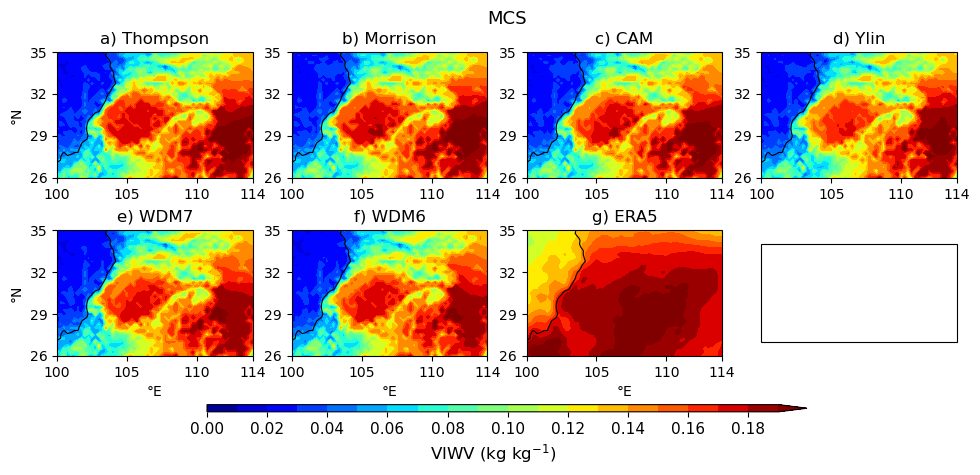

In [58]:
#datasets
ds = [viwv_tho, viwv_mor, viwv_cam, viwv_ylin, viwv_wdm7, viwv_wdm6, viwv_ERA]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']
#colormap
cmap  = plt.cm.jet
#set clevels
clevs=np.arange(0,0.2,0.01)

#create figure
nrows, ncols = 2,4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,4))
axs = axs.flatten()
fig.suptitle('MCS', fontsize=13, y=1.01)

# loop for datasets
for i in range (0, 7):
 cs = axs[i].contourf(meant_qERA.longitude.values, meant_qERA.latitude.values, ds[i], clevs, cmap=cmap, extend='max')
 axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.8)
 axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12) 
 axs[i].set_xticks([100,105,110,114])
 axs[i].set_yticks([26,29,32,35])
 axs[i].tick_params(axis='x', labelsize=10)  
 axs[i].tick_params(axis='y', labelsize=10)
 axs[0].set_ylabel('°N', fontsize=10)
 axs[4].set_ylabel('°N', fontsize=10)
 axs[4].set_xlabel('°E', fontsize=10)
 axs[5].set_xlabel('°E', fontsize=10)
 axs[6].set_xlabel('°E', fontsize=10)
 axs[7].set_xlabel('°E', fontsize=10)


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.005, 0.6, 0.018])
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'VIWV (kg kg$^{-1}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)

plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/viwv-maps-mcs.png', dpi=400, bbox_inches='tight');

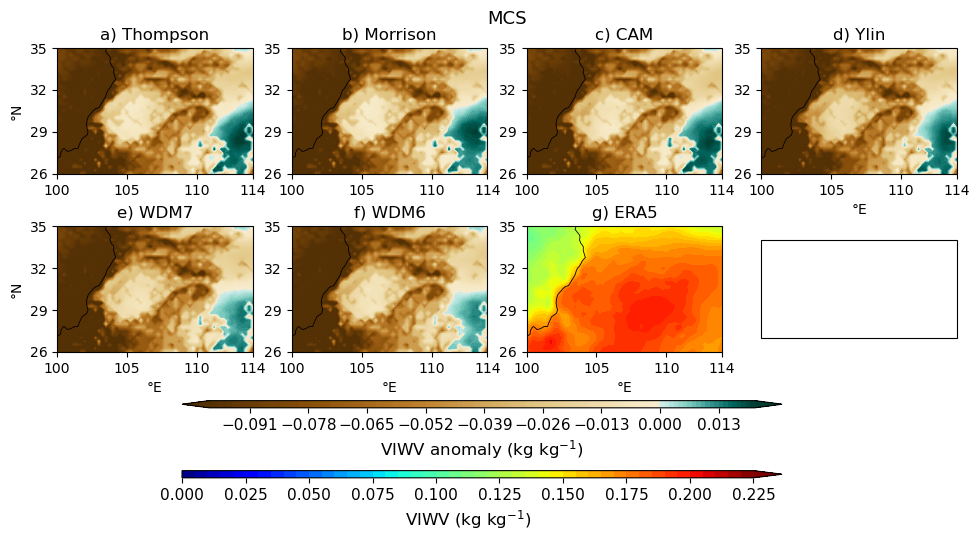

In [53]:
# Maps of anomalies for Article
from matplotlib import font_manager

#datasets
ds = [viwv_tho - viwv_ERA, viwv_mor - viwv_ERA, viwv_cam - viwv_ERA, viwv_ylin - viwv_ERA, viwv_wdm7 - viwv_ERA, viwv_wdm6 - viwv_ERA, viwv_ERA]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 4))
axs = axs.flatten()
fig.suptitle('MCS', y=1, fontsize=13)

clevs=np.arange(-0.1,0.021,0.001)
clevs1=np.arange(0,0.23,0.005)
#cmap = 'BrBG'

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-0.1, vmax=0.021, vcenter=0)

cmap1 = sns.color_palette("flare", as_cmap=True)
cmap1 = sns.cubehelix_palette(start=.3, rot=-.75, as_cmap=True) 


for j in range(0,7):
    axs[j].set_xticks([100,105,110,114])
    axs[j].set_yticks([26,29,32,35])
    axs[j].tick_params(axis='x', labelsize=10)  
    axs[j].tick_params(axis='y', labelsize=10)
 
for i in range(0,6):
    c0 = axs[i].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[i], clevs, cmap=trimmed_cmap, norm=norm, extend='both') #trimmed_cmap
    axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.6)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12)

#era5
c6 = axs[6].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[6], clevs1, cmap='jet', extend='max')
axs[6].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='k', linewidths=0.6)
axs[6].set_xlabel('°E', fontsize=10)
axs[6].set_title('g) ERA5', fontsize=12)

axs[0].set_ylabel('°N', fontsize=10)
axs[3].set_xlabel('°E',fontsize=10)
axs[4].set_xlabel('°E',fontsize=10)
axs[4].set_ylabel('°N',fontsize=10)
axs[5].set_xlabel('°E',fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.175, 0.005, 0.6, 0.018])
cbar=fig.colorbar(c0, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'VIWV anomaly (kg kg$^{-1}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)

# Add a 2nd colorbar axis at the bottom of the graph
cbar_ax2 = fig.add_axes([0.175, -0.17, 0.6, 0.018])
cbar2 = fig.colorbar(c6, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(r'VIWV (kg kg$^{-1}$)', fontsize = 12)
cbar2.ax.tick_params(labelsize=11)

fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/viwv-bias-mcs.png', dpi=400, bbox_inches='tight');

## Fabians suggestion

In [43]:
viwv1_tho = IVT(imeant_qtho, imeant_qtho.level)
viwv1_mor = IVT(imeant_qmor, imeant_qmor.level)
viwv1_cam = IVT(imeant_qcam, imeant_qcam.level)
viwv1_ylin = IVT(imeant_qylin, imeant_qylin.level)
viwv1_wdm7 = IVT(imeant_qwdm7, imeant_qwdm7.level)
viwv1_wdm6 = IVT(imeant_qwdm6, imeant_qwdm6.level)
viwv1_ERA = IVT(meant_qERA, meant_qERA.level)

In [72]:
# Maps of anomalies for Article
from matplotlib import font_manager

ds = []
#datasets
ds = [viwv1_tho, viwv1_mor, viwv1_cam, viwv1_ylin, viwv1_wdm7, viwv1_wdm6, viwv1_ERA]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 4))
axs = axs.flatten()
fig.suptitle('MCS', y=1, fontsize=13)

clevs=np.arange(-35,8,0.1) #-35,8,1
clevs1=np.arange(0,65,1) #65,1

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-35, vmax=8, vcenter=0) #

cmap1 = sns.color_palette("flare", as_cmap=True)
cmap1 = sns.cubehelix_palette(start=.3, rot=-.75, as_cmap=True) 


for j in range(0,7):
    axs[j].set_xticks([100,105,110,114])
    axs[j].set_yticks([26,29,32,35])
    axs[j].tick_params(axis='x', labelsize=10)  
    axs[j].tick_params(axis='y', labelsize=10)
 
for i in range(0,6):
    c0 = axs[i].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[i], clevs, cmap=trimmed_cmap, norm=norm, extend='both') #clevs, trimmed_cmap, norm=norm,
    axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.6)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12)

#era5
c6 = axs[6].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[6], clevs1, cmap='jet', extend='max')
axs[6].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='k', linewidths=0.6)
axs[6].set_xlabel('°E', fontsize=10)
axs[6].set_title('g) ERA5', fontsize=12)

axs[0].set_ylabel('°N', fontsize=10)
axs[3].set_xlabel('°E',fontsize=10)
axs[4].set_xlabel('°E',fontsize=10)
axs[4].set_ylabel('°N',fontsize=10)
axs[5].set_xlabel('°E',fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.175, 0.005, 0.6, 0.018])
cbar=fig.colorbar(c0, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'VIWV anomaly (kg m$^{-2}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)

# Add a 2nd colorbar axis at the bottom of the graph
cbar_ax2 = fig.add_axes([0.175, -0.17, 0.6, 0.018])
cbar2 = fig.colorbar(c6, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(r'VIWV (kg m$^{-2}$)', fontsize = 12)
cbar2.ax.tick_params(labelsize=11)

fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/viwv1-bias-mcs.png', dpi=400, bbox_inches='tight');

SyntaxError: invalid syntax (205383814.py, line 30)

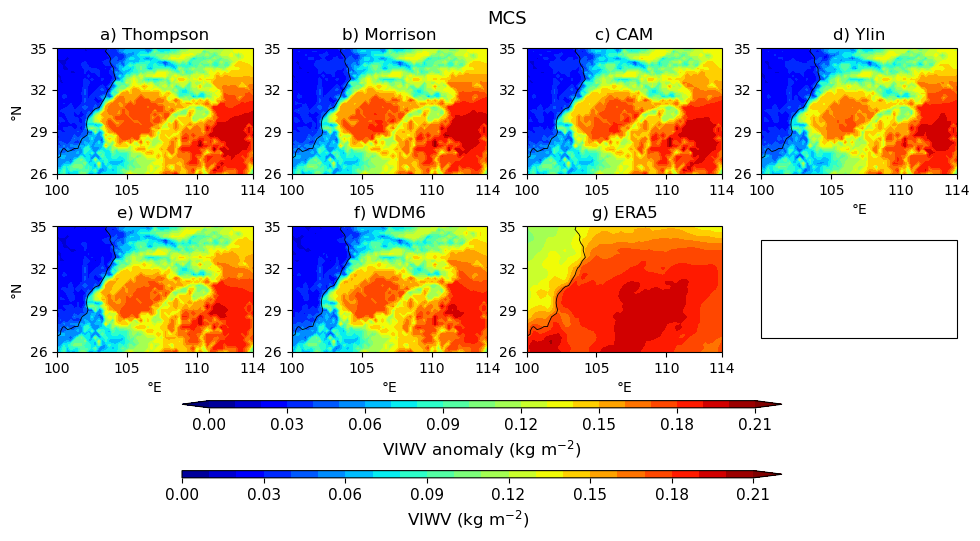

In [71]:
# Maps of anomalies for Article --> neeed to change viwv, its the old wrong one
from matplotlib import font_manager

ds = []
#datasets
ds = [viwv_tho, viwv_mor, viwv_cam, viwv_ylin, viwv_wdm7, viwv_wdm6, viwv_ERA]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 4))
axs = axs.flatten()
fig.suptitle('MCS', y=1, fontsize=13)

clevs=np.arange(-0.2,0.2,0.01) #-35,8,1
clevs1=np.arange(0,0.22,0.01)

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=-35, vmax=8, vcenter=0) #

cmap1 = sns.color_palette("flare", as_cmap=True)
cmap1 = sns.cubehelix_palette(start=.3, rot=-.75, as_cmap=True) 


for j in range(0,7):
    axs[j].set_xticks([100,105,110,114])
    axs[j].set_yticks([26,29,32,35])
    axs[j].tick_params(axis='x', labelsize=10)  
    axs[j].tick_params(axis='y', labelsize=10)
 
for i in range(0,6):
    c0 = axs[i].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[i], clevs1, cmap='jet', extend='both') #clevs, trimmed_cmap, norm=norm,
    axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.6)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12)

#era5
c6 = axs[6].contourf(ds_ERA.longitude, ds_ERA.latitude, ds[6], clevs1, cmap='jet', extend='max')
axs[6].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='k', linewidths=0.6)
axs[6].set_xlabel('°E', fontsize=10)
axs[6].set_title('g) ERA5', fontsize=12)

axs[0].set_ylabel('°N', fontsize=10)
axs[3].set_xlabel('°E',fontsize=10)
axs[4].set_xlabel('°E',fontsize=10)
axs[4].set_ylabel('°N',fontsize=10)
axs[5].set_xlabel('°E',fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.175, 0.005, 0.6, 0.018])
cbar=fig.colorbar(c0, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'VIWV anomaly (kg m$^{-2}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)

# Add a 2nd colorbar axis at the bottom of the graph
cbar_ax2 = fig.add_axes([0.175, -0.17, 0.6, 0.018])
cbar2 = fig.colorbar(c6, cax=cbar_ax2,orientation='horizontal')
cbar2.set_label(r'VIWV (kg m$^{-2}$)', fontsize = 12)
cbar2.ax.tick_params(labelsize=11)

fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)
